<a href="https://colab.research.google.com/github/aytekin827/AIB_03_SprintChallenge/blob/main/ai03_sc13x_%EC%A0%95%EB%AF%BC%EC%9E%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SC13x Linear Algebra

## 1. $\vec{c} \cdot \vec{d}$ 를 구해보세요. 이 두 개의 vector는 orthogonal 관계 (직교)에 있나요? 왜 그런가요? 왜 아닌가요?

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

In [1]:
import numpy as np

In [2]:
c = np.array([3,7,-2,12])
d = np.array([9,-7,4,6])

print('내적 값:',np.dot(c,d))

print('내적 값이 0이 아니므로 직교관계가 아닙니다')

내적 값: 42
내적 값이 0이 아니므로 직교관계가 아닙니다


## 2. $E^{-1}$ 와 $E^{T}$ 를 구하세요.

\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

In [3]:
e = np.array([7,4,2,1,3,-1,2,6,-4]).reshape(3,3)
e_inverse = np.linalg.inv(e)
e_transpose = np.transpose(e)

print('역행렬:\n',e_inverse)
print('전치행렬:\n',e_transpose)

역행렬:
 [[ 0.17647059 -0.82352941  0.29411765]
 [-0.05882353  0.94117647 -0.26470588]
 [ 0.          1.         -0.5       ]]
전치행렬:
 [[ 7  1  2]
 [ 4  3  6]
 [ 2 -1 -4]]


## 3. $|F|$ 를 구하세요. 이 데이터는 어떤 의미가 있나요?

\begin{align}
F = 
\begin{bmatrix}
    2 & -2 & 5 \\
    4 & 1 & 10 \\
    12 & 6 & 30
\end{bmatrix}
\end{align}

In [25]:
f = np.array([2,-2,5,4,1,10,12,6,30]).reshape(3,3)
f_det = np.linalg.det(f)
f_det
print('f determinent:',f_det)
print('determenent의 값이 0 이므로 역행렬이 존재하지 않는다.')
print('매트릭스의 행간의 선형관계가 있다')
print('rank =',np.linalg.matrix_rank(f) )

f determinent: 0.0
determenent의 값이 0 이므로 역행렬이 존재하지 않는다.
매트릭스의 행간의 선형관계가 있다
rank = 2


## 4. 다음 데이터의 covariance, correlation을 구하세요.

- x = [820, 760, 1250, 990, 1080, 1450, 1600]

- y = [0, 1, 7, 1, 0, 6, 4]

In [5]:
x = np.array([820,760,1250,990,1080,1450,1600])
y = np.array([0,1,7,1,0,6,4])

xy_cov = np.cov(x,y)[0,1]
xy_corr = np.corrcoef(x,y)[0,1]

print('covariace:',xy_cov)
print('correlation:',xy_corr)

covariace: 670.2380952380952
correlation: 0.7284634644730714


## 5. 다음 데이터를 정규화 하세요.

아래 링크를 참조하세요.

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [6]:
import pandas as pd

data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df = pd.DataFrame(data)

df

,Country,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
1,Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
2,Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
3,North Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [53]:
from sklearn.preprocessing import StandardScaler

# country 열 제거
df1 = df.drop(columns='Country')

# 정규화
scaler = StandardScaler()
df_scale = pd.DataFrame(scaler.fit_transform(df1),columns=df1.columns)
df_scale.insert(0,'Country',df['Country'])
df_scale

,Country,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,England,0.658275,-0.017495,-0.259546,0.644585,-0.632429,0.130551,-0.450076,0.863312,0.377736,-0.336265,0.805477,0.737407,-0.644322,-0.051917,-0.435231,0.104998,-0.138303
1,Wales,0.535805,-1.277169,1.198856,1.152440,1.535899,1.547958,0.435696,1.093528,1.401682,0.084066,1.171603,0.929297,1.679463,1.609440,-1.404236,0.841823,0.968122
2,Scotland,0.535805,-0.227441,0.543811,-0.332059,-1.097071,-0.540853,-1.335847,-0.709834,-0.496364,1.513193,-0.878702,-0.057567,-0.855575,-0.467257,1.190727,0.716563,0.746837
3,North Ireland,-1.729885,1.522105,-1.483121,-1.464967,0.193601,-1.137656,1.350227,-1.247006,-1.283054,-1.260994,-1.098378,-1.609137,-0.179565,-1.090266,0.648741,-1.663384,-1.576656


In [54]:
df_scale.columns[1:]

Index(['Cheese', 'Carcass_Meat', 'Other_Meat', 'Fish', 'Fats_and_Oils',
       'Sugars', 'Fresh_Potatoes', 'Fresh_Veg', 'Other_Veg',
       'Processed_Potatoes', 'Processed_Veg', 'Fresh_Fruit', 'Cereals',
       'Beverages', 'Soft_Drinks', 'Alcoholic Drinks', 'Confectionery'],
      dtype='object')

## 6. 위 데이터에 PCA 를 적용 후 scatterplot을 그리세요.

n_component=2로 했을때 설명하는 분산의 비율이 93% 이상이므로 2개의 주성분으로 차원감소해도 무난하다고 볼 수 있다.

PC1, PC2가 설명하는 분산의 비율: 0.9319915970724626 



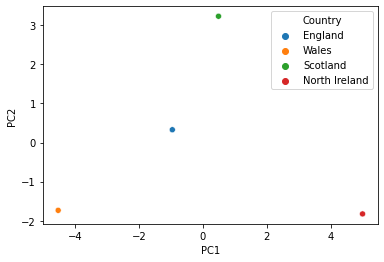

In [61]:
from sklearn.decomposition import PCA
import seaborn as sns

# PCA
pca = PCA(2)
res_pca = pca.fit_transform(df_scale[df_scale.columns[1:]])
pcaDF = pd.DataFrame(data=res_pca,columns=['PC1','PC2'])
pcaDF

print('n_component=2로 했을때 설명하는 분산의 비율이 93% 이상이므로 2개의 주성분으로 차원감소해도 무난하다고 볼 수 있다.')
print('\nPC1, PC2가 설명하는 분산의 비율:',pca.explained_variance_ratio_.sum(),'\n')

# scatter plot 그리기
sns.scatterplot(x='PC1',y='PC2',data=pcaDF,hue=df_scale['Country'])
plt.show()

## 7. 아래 데이터에 대해 k-means clustering을 적용 후, 결과를 그래프로 그리세요.



In [9]:
points = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/sc13x/data.csv')
points.head()

,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729
2,-0.192822,-9.671030
3,-6.401456,-5.223972
4,-0.804026,-9.704457


In [10]:
points.shape

(200, 2)

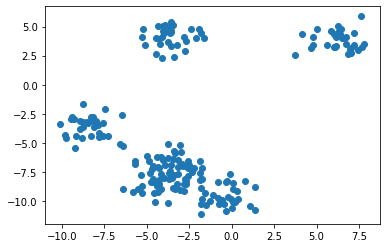

In [11]:
plt.scatter(points['x'],points['y'])
plt.show()

In [12]:
# 산점도를 본 결과 n=3, n=4, n=5 로 kmeans clustering을 한 후에 결과를 보고 결정해야겠다는 생각을 하였습니다.

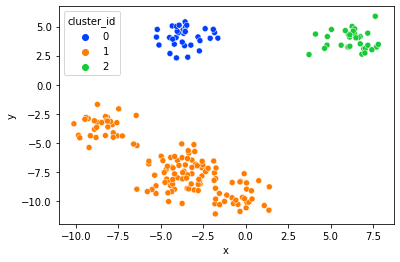

In [84]:
# n_cluster = 3
kmeans3 = KMeans(3).fit(points)

points['cluster_id'] = kmeans3.labels_

sns.scatterplot(x='x', y='y',data=points, hue='cluster_id',palette='bright')
plt.show()

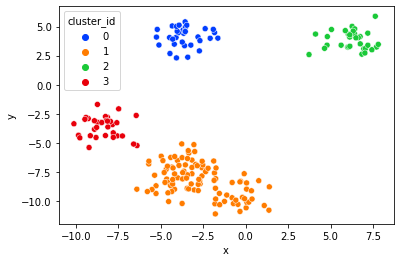

In [85]:
# n_cluster = 4
kmeans4 = KMeans(4).fit(points)

points['cluster_id'] = kmeans4.labels_

sns.scatterplot(x='x', y='y',data=points, hue='cluster_id',palette='bright')
plt.show()

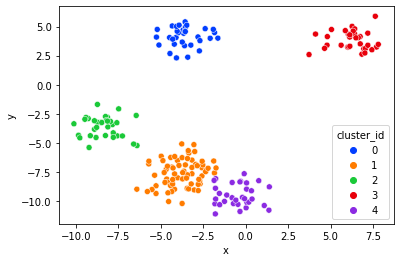

In [86]:
kmeans5 = KMeans(5).fit(points)

points['cluster_id'] = kmeans5.labels_

sns.scatterplot(x='x', y='y',data=points, hue='cluster_id',palette='bright')
plt.show()

# SC 3점 요구사항:
위에서 요구된 사항들을 모두 정확하게 만족하였으며, 아직 시간이 남았다면 아래 2개의 내용들 중 하나를 만족하는 경우 3점을 얻을 수 있습니다.

아래 요구사항들은 모두 optional 임을 다시 한 번 강조합니다. (필수 요구사항이 아닙니다.)

- 6번의 PCA 결과에 대해서 Scree plot을 추가하세요.

- 7번에서 k값을 선택하는 과정을 논리적으로 설명하세요.


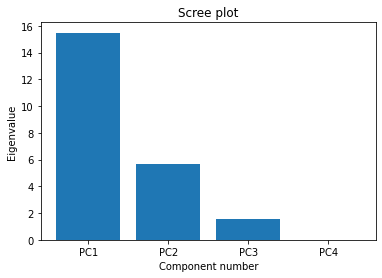

In [20]:
# PCA
pca4 = PCA(4)
pca4.fit_transform(df_scale)

# scree plot
plt.bar(['PC1','PC2','PC3','PC4'],pca4.explained_variance_)
plt.title('Scree plot')
plt.xlabel('Component number')
plt.ylabel('Eigenvalue')
plt.show()

In [89]:
# elbow method

sum_of_squared_dis = []
K = range(1,15)
for k in K:
  km = KMeans(n_clusters = k)
  km = km.fit(points)
  sum_of_squared_dis.append(km.inertia_)

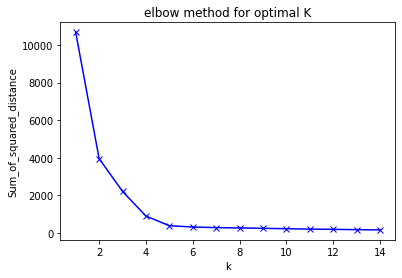

In [94]:
plt.plot(K,sum_of_squared_dis,'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distance')
plt.title('elbow method for optimal K')
plt.show()

# 그림에서 4~5정도에서 팔이 꺽이고 있으므로 k 4~5개 정도로 하는것이 적당함.

In [19]:
# kmeans clustering 결과 클러스터가 4,5 개 일때 모두 깔끔하게 분류가 되는 것을 볼 수 있다.
# 하지만 이 데이터에 대한 도메인 지식이 없고 어디서부터 나온 어떤 데이터인지 알 수 없으므로 분류된 것들에 대한 정확도 판단을 내릴수가 없습니다.
# 따라서 지금 k를 결정하는 것이 힘들다고 생각합니다.
# 데이터에 대해서 더 조사한 후에 결정해야 한다고 생각합니다.